# Analysis

1. There is a relatively strong correlation bewteen latitude and temperature. The lower 
   latitudes have higher temperatures and the higher latitudes have lower temperatures.
2. The correlation between humidity and latitude is very weak.
3. There is almost no correlation between cloudiness and latitude.
4. The correlation between latitude and wind speed is very weak.
5. Although my sample was random there was a bias toward cities in the northern 
   hemisphere. Most of the cities in my sample were located in Europe.

In [1]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from citipy import citipy
import random
import csv
import requests
import time

In [2]:
api_key = "213a12f465b96b1217eafde3156aab85"

In [3]:
#Import CSV file, and read into DataFrame.

world_data = pd.read_csv("resources/worldcities.csv")

#Preview the data.
world_data.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [4]:
# Randomly select 500 cities for weather data.

selected_cities = world_data.sample(n=500)

#Visualize the selected cities DataFrame.

selected_cities

,Country,City,Latitude,Longitude
15276,hr,omis,43.444722,16.688611
11506,fr,chateau-thierry,49.050000,3.400000
30202,ph,silawit,16.873156,121.759242
7823,cz,benesov,49.782377,14.686569
35730,ru,donskoy,53.681030,38.647755
16606,ie,bundoran,54.466667,-8.283333
16032,hu,szikszo,48.200000,20.933333
2273,br,aguai,-22.066667,-46.966667
26771,pe,san jeronimo,-13.650556,-73.365000
34328,ro,stalpeni,45.050000,24.966667


In [5]:
#Counter

row_count = 0

# Create blank columns for the necessary fields.

selected_cities["Temperature"] = ""
selected_cities["Humidity"] = ""
selected_cities["Cloudiness"] = ""
selected_cities["Wind Speed"] = ""

# Loop through and get the weather data using the Open Weather API.

for index, row in selected_cities.iterrows():
    #Sleep to help with the call limit
    
    time.sleep(1)
    
    #Open weather url.
    
    url = "https://api.openweathermap.org/data/2.5/weather?"
    units = "Imperial"
    
    query_url = url + "lat="+ str(row["Latitude"]) + "&lon=" + str(row["Longitude"]) + "&appid=" + api_key + "&units=" + units
    #Print log to ensure the loop is working correctly.
    
    print("Now retieving city # " + str(row_count))
    print(query_url)
    row_count += 1
    
    #Run requests to grab the JSON at the requested URL
    
    city_weather = requests.get(query_url).json()
    
    
  
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        selected_cities.set_value(index, "Temperature", temperature)
        selected_cities.set_value(index,"Humidity", humidity)
        selected_cities.set_value(index,"Cloudiness", cloudiness)
        selected_cities.set_value(index,"Wind Speed", wind_speed)
    except:
        print("Error with weather data, skipping.")
        #continue
selected_cities  

Now retieving city # 0
https://api.openweathermap.org/data/2.5/weather?lat=43.4447222&lon=16.6886111&appid=213a12f465b96b1217eafde3156aab85&units=Imperial


C:\Users\dhang\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dhang\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dhang\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dhang\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


Now retieving city # 1
https://api.openweathermap.org/data/2.5/weather?lat=49.05&lon=3.4&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 2
https://api.openweathermap.org/data/2.5/weather?lat=16.873155999999998&lon=121.75924199999999&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 3
https://api.openweathermap.org/data/2.5/weather?lat=49.782377000000004&lon=14.686569&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 4
https://api.openweathermap.org/data/2.5/weather?lat=53.68103000000001&lon=38.647755&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 5
https://api.openweathermap.org/data/2.5/weather?lat=54.466666700000005&lon=-8.2833333&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 6
https://api.openweathermap.org/data/2.5/weather?lat=48.2&lon=20.933332999999998&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 7
https://api.openweat

Now retieving city # 53
https://api.openweathermap.org/data/2.5/weather?lat=24.466667&lon=69.584007&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 54
https://api.openweathermap.org/data/2.5/weather?lat=47.7625&lon=-122.20416670000002&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 55
https://api.openweathermap.org/data/2.5/weather?lat=21.15&lon=-88.3125&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 56
https://api.openweathermap.org/data/2.5/weather?lat=13.35&lon=-88.35&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 57
https://api.openweathermap.org/data/2.5/weather?lat=30.870301&lon=120.09329699999999&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 58
https://api.openweathermap.org/data/2.5/weather?lat=9.15&lon=-79.6166667&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 59
https://api.openweathermap.org/data/2.5/weather?la

Now retieving city # 106
https://api.openweathermap.org/data/2.5/weather?lat=45.7&lon=11.483333&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 107
https://api.openweathermap.org/data/2.5/weather?lat=45.566666999999995&lon=-73.2&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 108
https://api.openweathermap.org/data/2.5/weather?lat=39.5&lon=-0.43333299999999997&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 109
https://api.openweathermap.org/data/2.5/weather?lat=41.944444399999995&lon=20.9266667&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 110
https://api.openweathermap.org/data/2.5/weather?lat=36.2297222&lon=-93.1075&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 111
https://api.openweathermap.org/data/2.5/weather?lat=39.4561111&lon=-77.9641667&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 112
https://api.openweathermap

Now retieving city # 158
https://api.openweathermap.org/data/2.5/weather?lat=49.639484&lon=14.640219&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 159
https://api.openweathermap.org/data/2.5/weather?lat=47.092847&lon=5.493003&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 160
https://api.openweathermap.org/data/2.5/weather?lat=38.409167&lon=112.733333&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 161
https://api.openweathermap.org/data/2.5/weather?lat=41.6027778&lon=-87.7438889&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 162
https://api.openweathermap.org/data/2.5/weather?lat=43.883333&lon=-79.733333&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 163
https://api.openweathermap.org/data/2.5/weather?lat=17.233333&lon=77.583333&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 164
https://api.openweathermap.org/data/2.5/w

Now retieving city # 211
https://api.openweathermap.org/data/2.5/weather?lat=38.6286111&lon=-90.3194444&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 212
https://api.openweathermap.org/data/2.5/weather?lat=40.4677778&lon=22.9947222&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 213
https://api.openweathermap.org/data/2.5/weather?lat=54.118956000000004&lon=37.544592&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 214
https://api.openweathermap.org/data/2.5/weather?lat=12.7026&lon=124.0362&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 215
https://api.openweathermap.org/data/2.5/weather?lat=38.6533333&lon=-94.34861109999999&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 216
https://api.openweathermap.org/data/2.5/weather?lat=44.633333&lon=26.65&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 217
https://api.openweathermap.o

Now retieving city # 263
https://api.openweathermap.org/data/2.5/weather?lat=18.0369444&lon=-66.85027779999999&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 264
https://api.openweathermap.org/data/2.5/weather?lat=43.133888899999995&lon=-88.2219444&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 265
https://api.openweathermap.org/data/2.5/weather?lat=47.8108333&lon=-122.3761111&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 266
https://api.openweathermap.org/data/2.5/weather?lat=15.864583999999999&lon=100.585806&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 267
https://api.openweathermap.org/data/2.5/weather?lat=14.916666699999999&lon=-88.2333333&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 268
https://api.openweathermap.org/data/2.5/weather?lat=46.9966667&lon=-120.54666670000002&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving

Now retieving city # 315
https://api.openweathermap.org/data/2.5/weather?lat=58.966667&lon=5.75&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 316
https://api.openweathermap.org/data/2.5/weather?lat=45.435382000000004&lon=4.391051&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 317
https://api.openweathermap.org/data/2.5/weather?lat=49.713097999999995&lon=12.776297&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 318
https://api.openweathermap.org/data/2.5/weather?lat=10.4154&lon=123.0214&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 319
https://api.openweathermap.org/data/2.5/weather?lat=31.625246999999998&lon=71.06574&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 320
https://api.openweathermap.org/data/2.5/weather?lat=-19.6666667&lon=30.0&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 321
https://api.openweathermap.org/

Now retieving city # 368
https://api.openweathermap.org/data/2.5/weather?lat=8.35&lon=80.3833333&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 369
https://api.openweathermap.org/data/2.5/weather?lat=55.2295&lon=61.7487&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 370
https://api.openweathermap.org/data/2.5/weather?lat=45.183333000000005&lon=25.433332999999998&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 371
https://api.openweathermap.org/data/2.5/weather?lat=49.525&lon=6.0422222&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 372
https://api.openweathermap.org/data/2.5/weather?lat=33.416667&lon=130.65&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 373
https://api.openweathermap.org/data/2.5/weather?lat=40.764271&lon=-8.561096000000001&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 374
https://api.openweathermap.org/d

Now retieving city # 420
https://api.openweathermap.org/data/2.5/weather?lat=37.316666999999995&lon=13.65&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 421
https://api.openweathermap.org/data/2.5/weather?lat=41.2844444&lon=-84.3558333&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 422
https://api.openweathermap.org/data/2.5/weather?lat=25.9113889&lon=-80.2005556&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 423
https://api.openweathermap.org/data/2.5/weather?lat=48.633333&lon=9.35&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 424
https://api.openweathermap.org/data/2.5/weather?lat=12.810516&lon=121.46741499999999&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 425
https://api.openweathermap.org/data/2.5/weather?lat=47.277556&lon=34.706158&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 426
https://api.openweathermap.org

Now retieving city # 472
https://api.openweathermap.org/data/2.5/weather?lat=47.7272222&lon=-122.17833329999999&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 473
https://api.openweathermap.org/data/2.5/weather?lat=34.7152778&lon=-81.62388890000001&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 474
https://api.openweathermap.org/data/2.5/weather?lat=21.366667&lon=-102.85&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 475
https://api.openweathermap.org/data/2.5/weather?lat=41.1369444&lon=-77.44722220000001&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 476
https://api.openweathermap.org/data/2.5/weather?lat=56.605854&lon=57.766856000000004&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 477
https://api.openweathermap.org/data/2.5/weather?lat=52.983332999999995&lon=9.6&appid=213a12f465b96b1217eafde3156aab85&units=Imperial
Now retieving city # 478
http

,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
15276,hr,omis,43.444722,16.688611,82.4,51,0,5.82
11506,fr,chateau-thierry,49.050000,3.400000,71.6,43,8,10.29
30202,ph,silawit,16.873156,121.759242,72.34,99,92,3.27
7823,cz,benesov,49.782377,14.686569,66.72,40,0,3.36
35730,ru,donskoy,53.681030,38.647755,73.6,54,32,5.84
16606,ie,bundoran,54.466667,-8.283333,60.82,86,92,11.77
16032,hu,szikszo,48.200000,20.933333,66.2,88,75,2.24
2273,br,aguai,-22.066667,-46.966667,67.21,45,0,9.17
26771,pe,san jeronimo,-13.650556,-73.365000,48.2,66,75,2.48
34328,ro,stalpeni,45.050000,24.966667,70.27,74,36,2.37


In [6]:
selected_cities.to_csv("WorldWeatherData.csv", index=False)

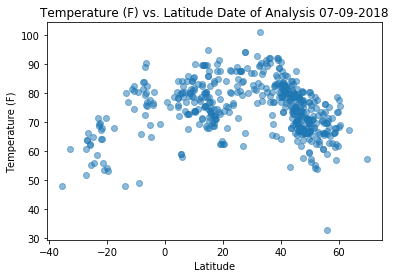

In [7]:
plt.scatter(selected_cities["Latitude"],selected_cities["Temperature"], alpha = 0.5)

plt.title("Temperature (F) vs. Latitude Date of Analysis 07-09-2018")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

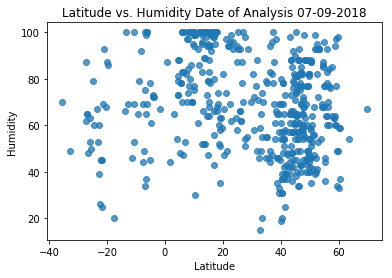

In [8]:
plt.scatter(selected_cities["Latitude"],selected_cities["Humidity"], alpha = 0.75)

plt.title("Latitude vs. Humidity Date of Analysis 07-09-2018")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Humidity.png")
plt.show()

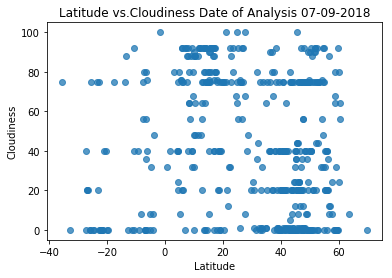

In [9]:
plt.scatter(selected_cities["Latitude"],selected_cities["Cloudiness"], alpha = 0.75)

plt.title("Latitude vs.Cloudiness Date of Analysis 07-09-2018")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness.png")
plt.show()

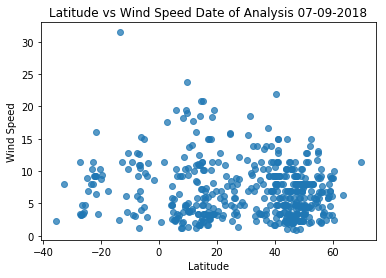

In [10]:
plt.scatter(selected_cities["Latitude"],selected_cities["Wind Speed"], alpha= 0.75)
plt.title("Latitude vs Wind Speed Date of Analysis 07-09-2018")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Wind Speed.png")
plt.show()

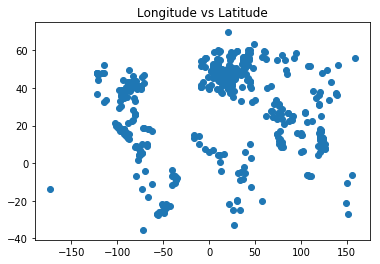

In [11]:
plt.scatter(selected_cities["Longitude"],selected_cities["Latitude"])
plt.title("Longitude vs Latitude")
plt.show()